#Speech Processing Lab - Week 4

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/12YqWYk4gzM6QVMg48qk-jQGS0QIzAzQH?usp=sharing

**Aim**

*  To understand the time and frequency domain characteristics of voiced and unvoiced speech.
*  To perform the voiced/unvoiced/silence classification of speech.

# Theory 

**Introduction**

Speech can be modeled is an acoustic signal produced from a speech production system. The system characteristics depends on the design of the system. For the case of linear time invariant system, this is completely characterized in terms its impulse response. However, the nature of response depends on the type of input excitation to the system. For instance, we have impulse response, step response, sinusoidal response and so on for a given system. Each of these output responses are used to understand the behavior of the system under different conditions. A similar phenomenon happens in the production of speech also. Based on the input excitation phenomenon, the speech production can be broadly categorized into three activities. The first case where the input excitation is nearly periodic in nature, the second case where the input excitation is random noise-like in nature and third case where there is no excitation to the system. Accordingly, the speech signal can be broadly categorized into three regions as voiced speech, Unvoiced Speech and Silence. The study of these regions is the aim of this experiment.

**Voiced Speech**

If the input excitation is nearly periodic impulse sequence, then the corresponding speech looks visually nearly periodic and is termed as voiced speech.During the production of voiced speech, the air exhaling out of lungs through the trachea is interrupted periodically by the vibrating vocal folds. Due to this, the glottal wave is generated that excites the speech production system resulting in the voiced speech.Thus grossly, when we look at the speech signal waveform, if it looks nearly periodic in nature, then it can be marked as voiced speech.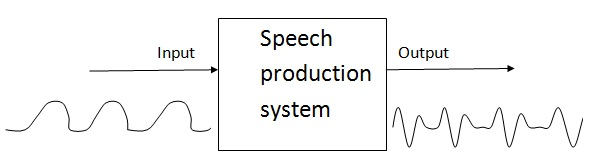

**Unvoiced Speech**

If the excitation is random noise-like, then the resulting speech will also be random noise-like without any periodic nature and is termed as Unvoiced Speech. During the production of unvoiced speech, the air exhaling out of lungs through the trachea is not interrupted by the vibrating vocal folds. However, starting from glottis, somewhere along the length of vocal tract, total or partial closure occurs which results in obstructing air flow completely or narrowly. This modification of airflow results in stop or frication excitation and excites the vocal tract system to produce unvoiced speech. The unvoiced speech will not have any periodic nature. This will be the main distinction between voiced and unvoiced speech.

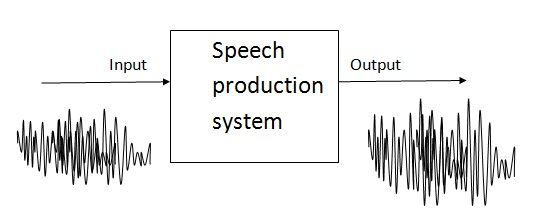

**Silence Region**
 
The speech production process involves generating voiced and unvoiced speech in succession, separated by what is called silence region. During silence region, there is no excitation supplied to the vocal tract and hence no speech output. However, silence is an integral part of speech signal. Without the presence of silence region between voiced and unvoiced speech, the speech will not intelligible. 

#Problem A

Record the phrase “Speech signal” and plot the time waveform. Use 16kHz and 16 bits/sample as the sampling frequency and bit resolution respectively.

**Procedure**
1.   Record the word 'Speech signal' using wavesurfer, save the recoring in .wav format and upload it in drive and access it in colab.
2. Plot the time domain plot of the audio.

In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week4
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week4
Lab4.ipynb  week4audio.wav


In [21]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

#Functions 

#Function to compute autocorrelation 
def autocorr(sound, sound_name):
  len = sound.shape[0]
  shift = np.arange(0, len, 1)
  autocorr = np.zeros((shift.shape[0],))

  for curr_shift in shift:
    autocorr[curr_shift] = np.dot(sound[0:len-curr_shift].T,sound[curr_shift:])
  return shift,autocorr

#Function to compute ZCR of a frame
def ZCR(frame,frameSize):
  zero_crosses = np.nonzero(np.diff(frame > 0))[0]
  val = zero_crosses.size
  val = val/frameSize
  return val

#Function to compute Short time energy of a frame
def shortTimeEnergy(frame,frameSize):
  energy = np.sum(np.square(frame))
  energy = energy/frameSize
  return energy

#Function to plot ZCR and Short Term Energy of a sound
def shortTimePlot(sound,soundName,frameSize,frameShift):
  curSamples = sound.size
  soundZCR = []; #Final ZCR array
  soundEnergy = []; #Final Energy array
  i = 0;
  while (curSamples > 0):
    if (curSamples>=frameSize):
      curWindow = sound[int (i*frameShift):int (i*frameShift + frameSize)]
    else:
      curWindow = sound[int (i*frameShift): audio.size]
    curZCR = ZCR(curWindow,frameSize)
    curEng = shortTimeEnergy(curWindow,frameSize)
    soundZCR.append(curZCR)
    soundEnergy.append(curEng)
    curSamples = curSamples - frameShift
    i = i+1
  soundZCR = np.array(soundZCR)
  soundEnergy = np.array(soundEnergy)
  return soundZCR,soundEnergy  

# Magnitude spuctrum plot function
def magnitudeSpectrum(sound):
    
  # Computing the FFT of the sound
  sound_len = sound.shape[0]
  sound_fft = fft(sound)/sound_len

  # Computing the frequency array
  freqs = fftfreq(sound_len, 1/fs)
  
  freqs = freqs[0:sound_len//2]
  fft_db = 2*np.log10(np.abs(sound_fft[0:sound_len//2]))
  return freqs,fft_db


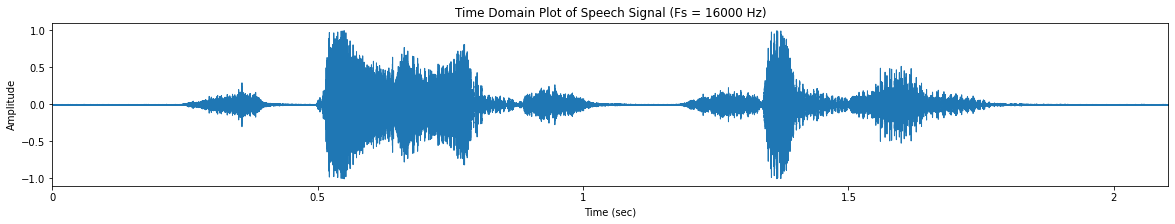

In [4]:
# Loading the audio into colab. Fs = 16kHz
audio, fs = librosa.load("week4audio.wav", sr = 16000)

# Plotting time domain plot of the audio
plt.figure(figsize=(20,3))
librosa.display.waveplot(audio, sr=fs);
plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

#Problem B

Examine  "s", "ch",  any one vowel, any one nasal from A as follows. Take one segment of 25 ms duration at the centre of the sound. Compute and plot the Autocorrelation function, and comment on the periodicity of the sounds. Compare the autocorrelation plots for various sounds and comment on how autocorrelation can be used for classifying the sounds as voiced and unvoiced.

**Procedure**
1. Extract the sound /s/, /ch/, /ee/ , and /n/ from the audio and the time stamp information from wavesurfer.
2. Perform autocorrelation on each sound and plot the corresponding plots. 

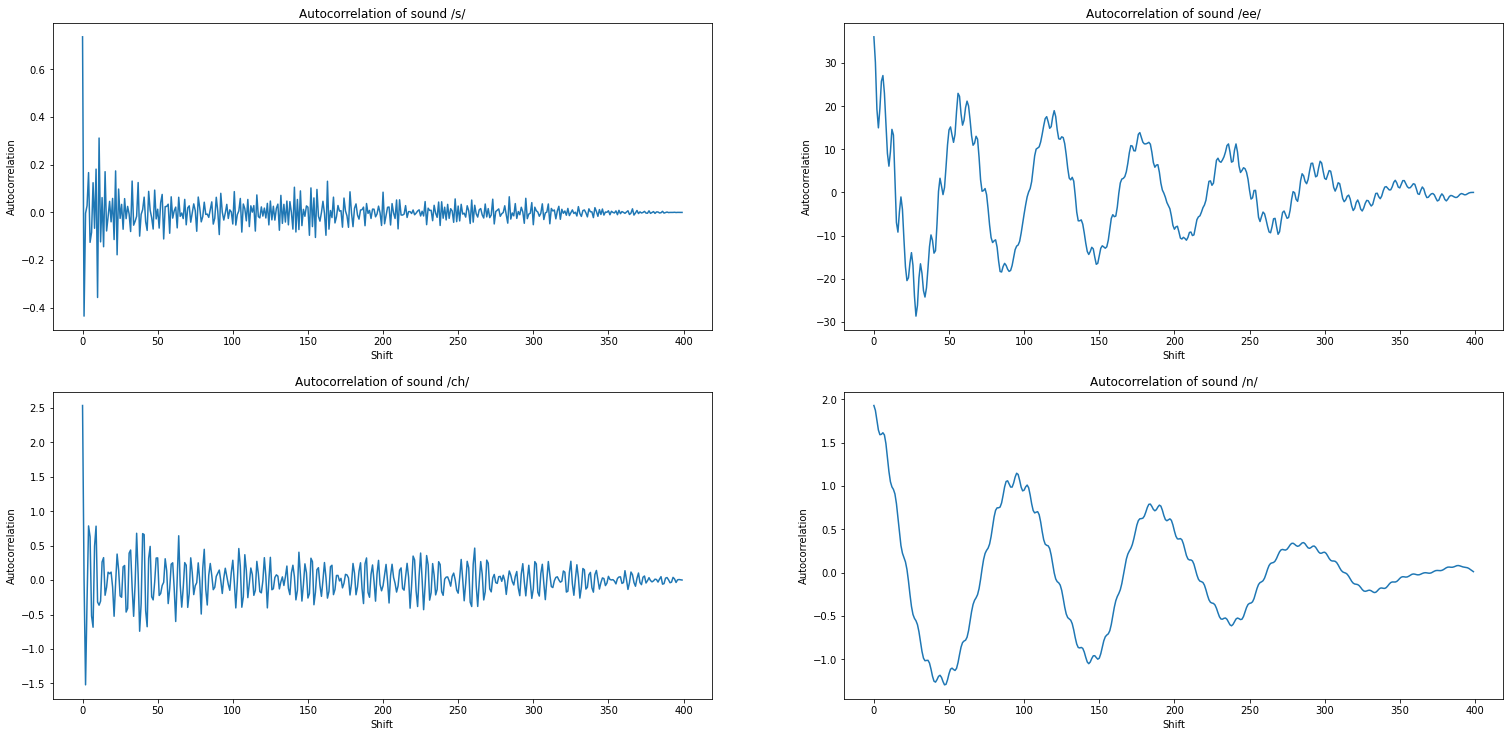

In [24]:
# Extracting different categories of sound in the speech
# The time stamp for each sound component was extracted from wavesurfer and they
# are as follows:
# /s/  - 0.236 s to 0.387 s
# /ee/ - 0.591 s to 0.756 s
# /ch/ - 0.883 s to 0.992 s
# /n/  - 1.407 s to 1.503 s
# sil  - 1.101 s to 1.165 s

s = audio[int(0.236*fs):int(0.387*fs)]
ee = audio[int(0.591*fs):int(0.756*fs)]
ch = audio[int(0.883*fs):int(0.992*fs)]
n = audio[int(1.407*fs):int(1.503*fs)]
sil = audio[int(1.101*fs):int(1.165*fs)]   

sounds = [s,ee,ch,n,sil]
soundName = ['s','ee','ch','n','sil']

# Computing Autocorrelation for each sound
alpha = int (0.0125 * fs) # Constant 
i = 0;
allShift = []
allAuto = []
for curSound in sounds:
  curLen = curSound.shape[0]
  temp = int (curLen/2)
  curFrame = curSound[(temp-alpha):(temp+alpha)]
  s,a= autocorr(curFrame,soundName[i])
  allShift.append(s)
  allAuto.append(a)
  if (i==3):
    break
  i = i+1

# Plotting Autocorrelation for each sound
i = 0;
plt.figure(figsize=(26,26))
while (i<4):
  plt.subplot(4,2,i+1)
  plt.plot(allShift[i],allAuto[i])
  plt.title("Autocorrelation of sound /"+soundName[i]+"/")
  plt.xlabel("Shift")
  plt.ylabel("Autocorrelation")
  i = i+1
plt.show()

**Observation**

The periodicity associated with the voiced speech can be measured by the autocorrelation analysis. This period is more commonly termed as pitch period. 
A 25 msec segment of voiced speech and its autocorrelation sequence are plotted in the above plots. 

In case of a periodic signal the autocorrelation functions has a distinct large peaks in the plot. The distance of the first largest peak in the autocorrelation sequence from the beginning represents pitch period. This is the important and main distinguishing factor for voiced speech. Since voiced speech is periodic in nature, we expect some fundamental frequency information to be present in the autocorrelation function.

In the above plots we can clearly observe that the sound /ee/ and /n/ has periodic nature in it and they are indeed produced by glotal vibration.

The aperiodicity of unvoiced speech can also be observed by the autocorrelation analysis. In case of unvoiced sound we do not observe any strong peak indicating periodicity.

In the above plots we can clearly observe /s/ and /ch/ does not have any clear peaks in the autocorrelation function and they are indeed unvoiced sounds.


# Problem C

Consider the 4 speech sounds mentioned in B and one silence segment.  For each of these 5 audio segments, compute and plot Short Term Zero-Crossing rate and the Short Term Energy as a function of frame index for all the frames in the sound. Use 25 msec and 10msec as frame_size and frame_shift respectively. Comment on how you would use these time-domain features for classifying the sounds as voiced or unvoiced or silence.

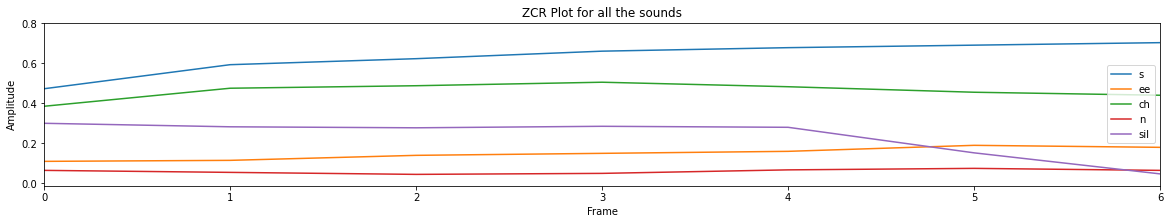

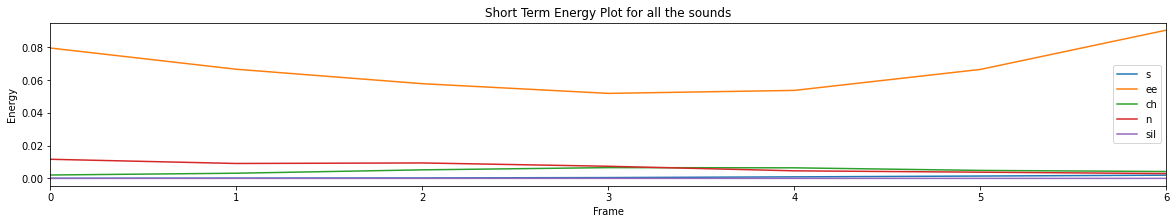

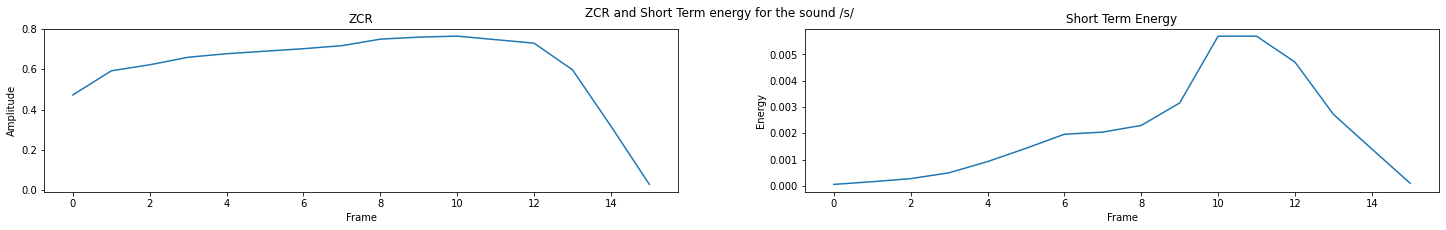

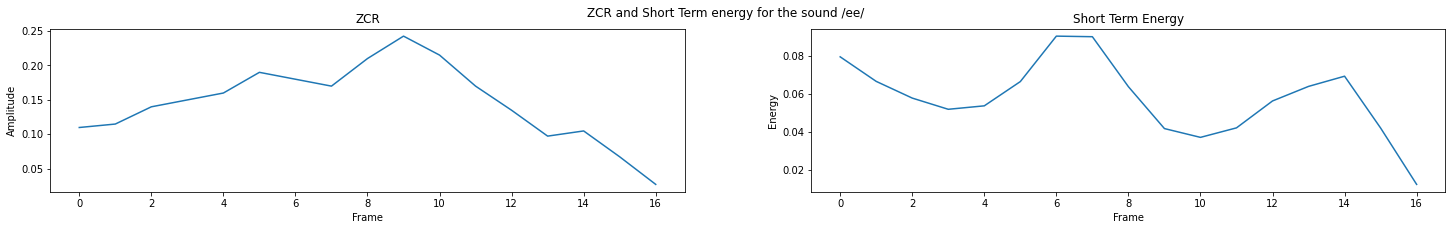

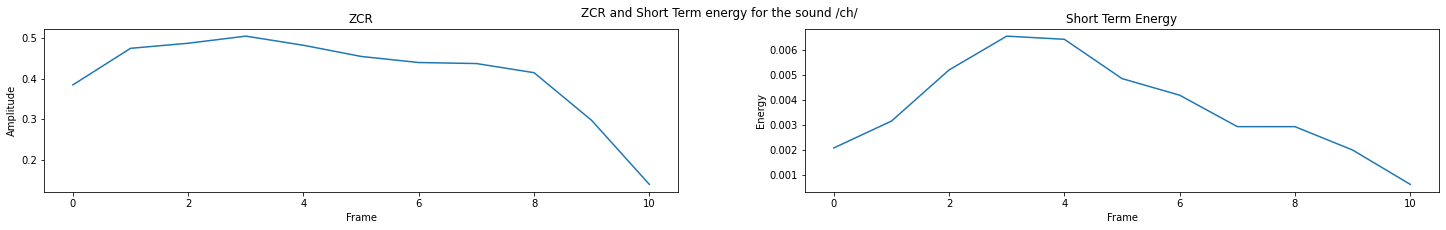

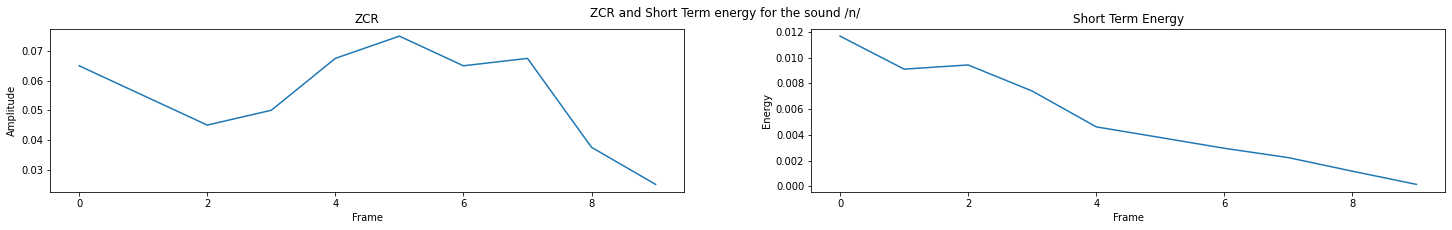

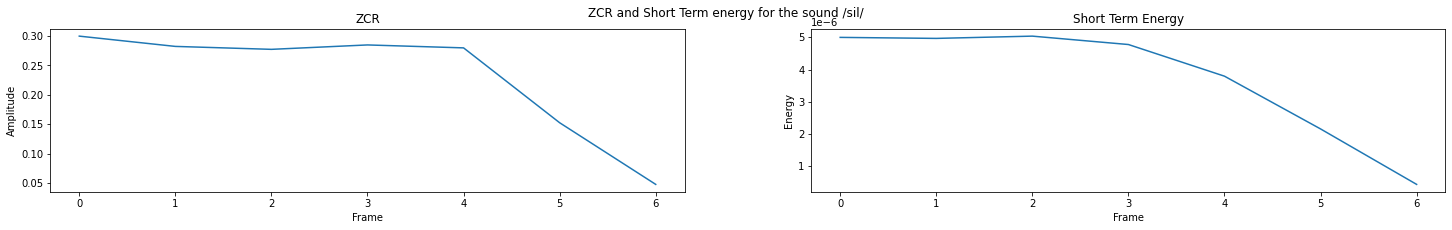

In [6]:

frameSize = 0.025*fs
frameShift = 0.010*fs

# Computing ZCR and Short Term Energy for each sound
i = 0
allZCR = [] #ZCR for all the sounds
allENG =[] #Short Term energy for all the sounds
for curSound in sounds:
  z,e = shortTimePlot(curSound,soundName[i],frameSize,frameShift)
  allZCR.append(z)
  allENG.append(e)
  i = i+1

# Plotting ZCR
plt.figure(figsize=(20,3))
for z in allZCR:
  plt.plot(z)
plt.title("ZCR Plot for all the sounds")
plt.legend(soundName)
plt.xlabel("Frame")
plt.ylabel("Amplitude")
plt.xlim([0,6])
plt.show()

# Plotting Short Term Energy
plt.figure(figsize=(20,3))
for e in allENG:
  plt.plot(e)
plt.title("Short Term Energy Plot for all the sounds")
plt.legend(soundName)
plt.xlabel("Frame")
plt.ylabel("Energy")
plt.xlim([0,6])
plt.show()
i = 0

# Plotting ZCR and Short Term energy for each sound individually
while (i<5):
  plt.figure(figsize=(25,3))
  plt.subplot(1,2,1)
  plt.title("ZCR")
  plt.plot(allZCR[i])
  plt.xlabel("Frame")
  plt.ylabel("Amplitude")
  plt.subplot(1,2,2)
  plt.title("Short Term Energy")
  plt.plot(allENG[i])
  plt.xlabel("Frame")
  plt.ylabel("Energy")
  plt.suptitle("ZCR and Short Term energy for the sound /" +soundName[i] +'/')
  i = i+1

**Observations**

From the above plots we can infer the following observations:

1. Voiced sounds like /ee/ has high Short Term Energy and low ZCR than background noise/silence
2. Unvoices fricatives like /s/ and /ch/ has low Short Term Energy and High ZCR than background noise.
3. Nasal sound /n/ has both Short Term Energy and ZCR lower than background noise.

# Problem D

Plot the magnitude spectrum (with magnitude in log scale)  of the 4 speech sounds. Comment/explain how the visual inspection of the spectrum can be used to classify the sound as voiced or unvoiced.

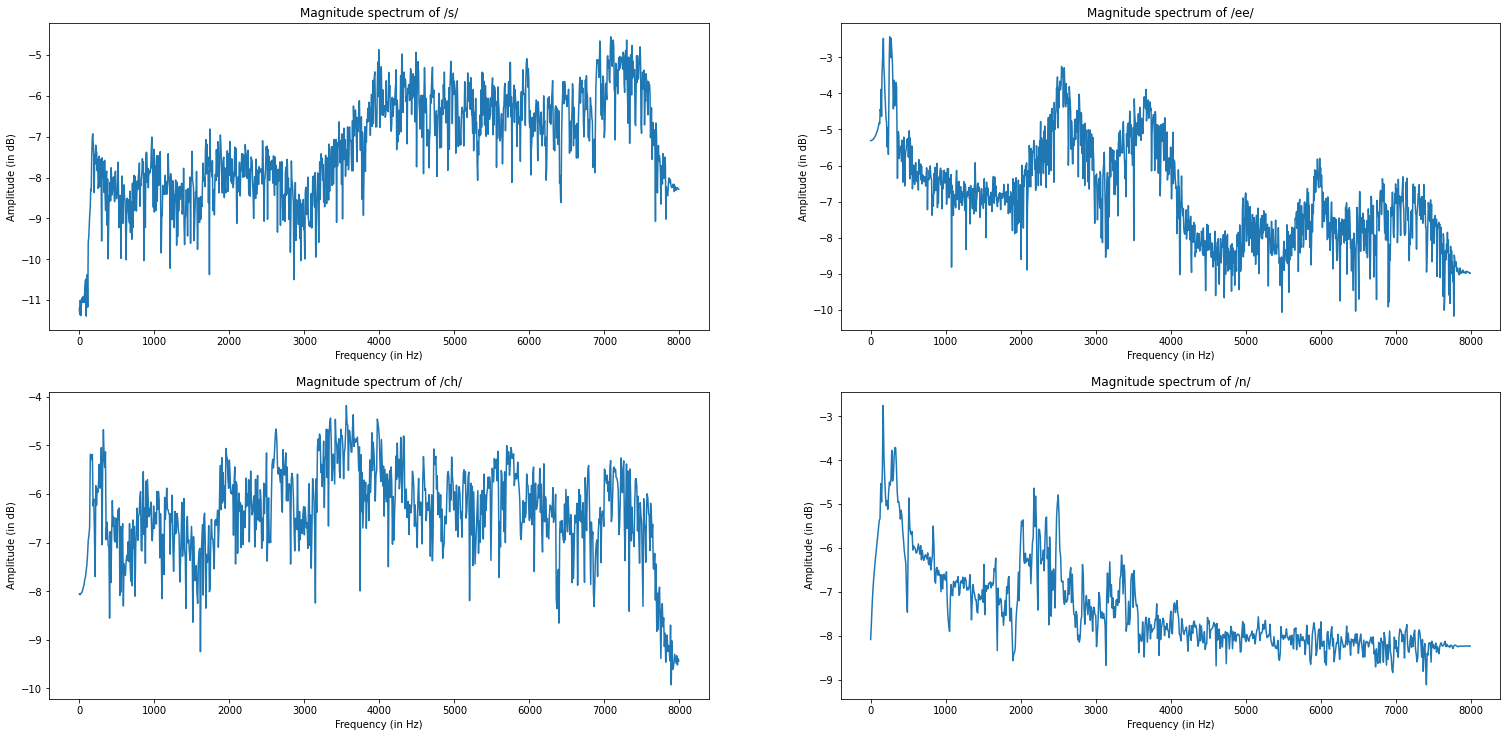

In [25]:
i = 0;
allFreqs = []
allFFT = []

# Computing magnitude spectrum for each sound
for curSound in sounds:
  f,db= magnitudeSpectrum(curSound)
  allFreqs.append(f)
  allFFT.append(db)
  if i==3:
    break
  i = i+1;

# Plotting the magnitude spectrum for each sound 
i = 0;
plt.figure(figsize=(26,26))
while (i<4):
  plt.subplot(4,2,i+1)
  plt.plot(allFreqs[i],allFFT[i])
  plt.title("Magnitude spectrum of /"+soundName[i]+"/")
  plt.xlabel("Frequency (in Hz)")
  plt.ylabel("Amplitude (in dB)")
  i = i+1

plt.show()

**Observation**

1. Incase of sounds like /ee/ and /n/ we can clearly observe the fundamental frequency and frequency components repeating at regular intervals indicating the presence of harmonic structure. This indicated the sound is periodic in nature and hence an be classified as voiced sound.
2. Incase of sounds like /s/ and /ch/ cannot observe any harmonic structure. In the frequency domain, the absence of this harmonic structure is the main distinguishing factor for unvoiced speech.

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=613&cnt=1
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/